In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
podcastDF = pd.read_csv('DataBases/clean_podcast_genres.csv', delimiter=',')
podcastDF.head()
podcastDF['rank_date'] = pd.to_datetime(podcastDF['rank_date'])

In [ ]:
g = sns.FacetGrid(podcastDF, col="genres")
g.map(sns.histplot, "rank")


In [ ]:
sns.lineplot(x="rank_date", y ='rank', hue="genres", data=podcastDF)

In [ ]:
#reduce the number of genres to analize the ones that were consistently highly rated
lowRank=['places', 'christianity', 'travel', 'careers', 'philosophy', 'music', 'performing', 'kids' , 'family']
podcastDFhighRank = podcastDF[~podcastDF['genres'].isin(lowRank)]
podcastDFhighRank.head()

<AxesSubplot:xlabel='rank_date', ylabel='rank'>

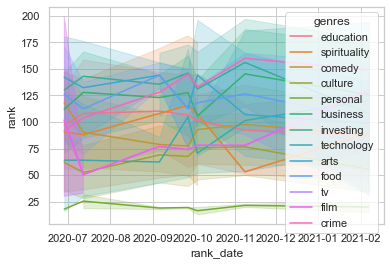

In [63]:
sns.lineplot(x="rank_date", y ='rank', hue="genres", data=podcastDFhighRank)

In [ ]:
g = sns.FacetGrid(podcastDFhighRank, col="genres", hue="genres")
g.map_dataframe(sns.lineplot, x="rank_date", y="rank")
g.set_axis_labels("Date", "Rank")
g.set_xticklabels(rotation=90)


In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [ ]:
plt.scatter(podcastDFhighRank['rank_date'], podcastDFhighRank['rank'])

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#sns.tsplot(podcastDFhighRank, time='rank_date', value ="rank")

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

In [ ]:
g = sns.FacetGrid(podcastDF , col="creator")
g.map(sns.histplot, "rank")

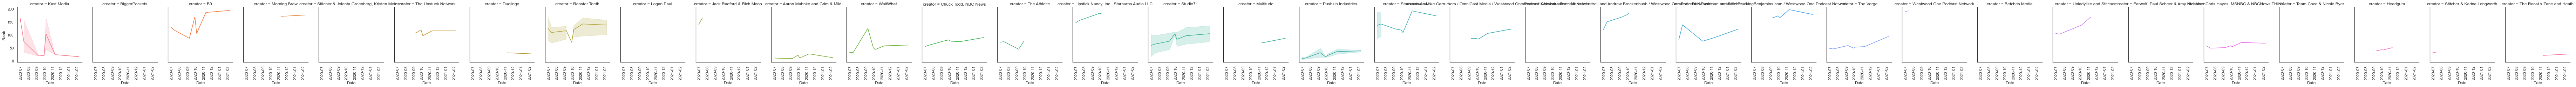

In [77]:
g = sns.FacetGrid(podcastDFhighRank, col="creator", hue="creator")
g.map_dataframe(sns.lineplot, x="rank_date", y="rank")
g.set_axis_labels("Date", "Rank")
g.set_xticklabels(rotation=90)

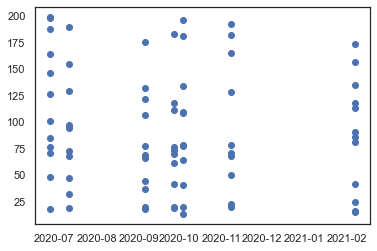

In [78]:
comedy = podcastDF[podcastDF['genres'] == 'comedy']
plt.scatter(comedy['rank_date'], comedy['rank'])

In [79]:
#dataFrame to compare ranks in each genre

podcast_unstack = podcastDFhighRank.drop(['name','creator'], axis=1)#

podcast_unstack['date']= podcast_unstack['rank_date']
podcast_unstack.drop(columns = 'rank_date')
podcast_unstack = podcast_unstack.groupby(['date', 'genres']).agg('mean').round(2) 

#podcast_unstack.rename('date','arts','business','comedy','crime','culture','education','film','food','investing','journals','personal','society','spirituality','technology','tv']

#new column per genre with the mean rank as value

podcast_unstack = podcast_unstack.unstack(level=-1)

#keep only the genres as the column names
podcast_unstack.columns = podcast_unstack.columns.droplevel(0)

#fill Na with 0
podcast_unstack.fillna(0, inplace= True)
podcast_unstack

genres,arts,business,comedy,crime,culture,education,film,food,investing,personal,spirituality,technology,tv
date,,,,,,,,,,,,,
2020-06-28,142.00,112.00,118.25,92.0,61.92,97.00,101.67,126.00,130.0,18.0,90.5,64.00,101.67
2020-07-12,132.25,127.83,90.30,104.0,52.50,108.00,50.50,112.33,143.0,25.5,88.0,64.00,50.50
2020-09-06,144.00,123.00,78.82,128.0,69.00,110.20,77.00,144.00,135.5,19.0,108.0,62.33,77.00
2020-09-27,112.50,127.60,77.40,145.0,67.64,106.60,74.00,112.50,146.0,19.5,115.5,104.67,74.00
2020-10-04,144.00,105.60,92.82,133.0,75.44,101.20,78.00,118.00,131.0,16.5,107.5,70.67,78.00
2020-11-08,107.00,145.20,97.70,160.0,76.64,92.25,78.00,126.50,156.0,21.5,53.0,101.33,78.00
2021-02-07,98.75,125.67,87.58,149.0,55.50,87.00,130.00,103.00,108.0,20.0,89.5,120.00,130.00


/Applications/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


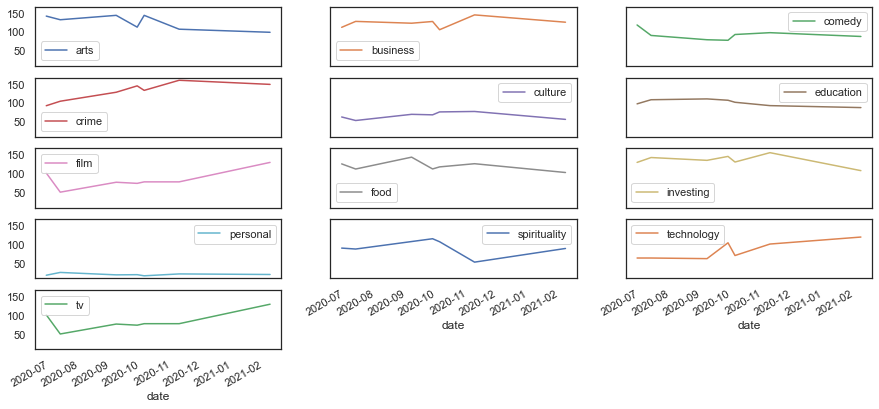

In [80]:
# plot data
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(15,7))

podcast_unstack.plot(ax=ax, subplots=True, layout=(5, -1), sharex=True, sharey=True)
ax.set_ylim(0,200)
plt.yticks(np.arange(0, 200, 50))

plt.show()

In [83]:
#find correlation among genres

podcast_corr = podcast_unstack.corr()

[Text(0.5, 57.453125, ''), Text(77.25312500000004, 0.5, '')]

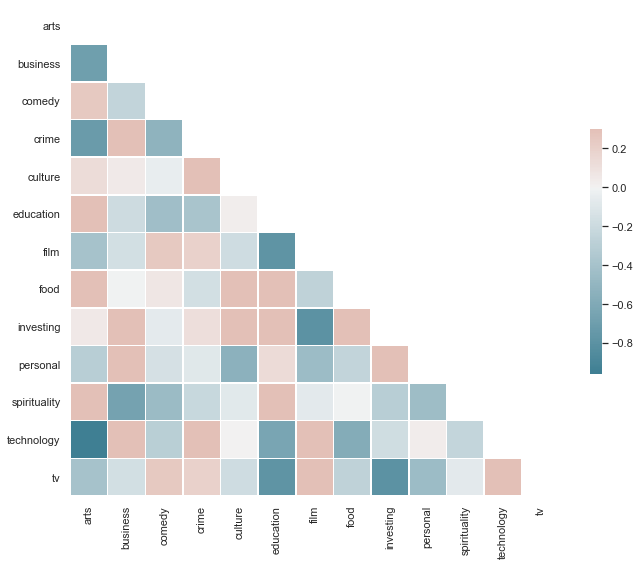

In [84]:
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(podcast_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(podcast_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set(xlabel='', ylabel='')

In [75]:
from dtaidistance import dtw


In [76]:
d = dtw.distance_fast(podcast_unstack['arts'], podcast_unstack['crime'], use_pruning=True)

The compiled dtaidistance C library is not available.
See the documentation for alternative installation options.


Exception: The compiled dtaidistance C library is not available.
See the documentation for alternative installation options.

In [85]:
#try to do dtw
!python -m pip install dtw

import numpy as np
from dtw import dtw

s1 = np.array([1,2,3,4,3,2,1,1,1,2]) 
s2 = np.array([0,1,1,2,3,4,3,2,1,1]) 



manhattan_distance = lambda s1,s2: np.abs(s1 - s2)

d, cost_matrix, acc_cost_matrix, path = dtw( s1,s2, dist=manhattan_distance)

print(d)

ModuleNotFoundError: No module named 'dtw'

In [110]:
movieDF = pd.read_csv('DataBases/movie_unstack.csv', delimiter=',')

In [111]:
movieDF = movieDF.add_suffix('_mov')
movieDF.head(30)

,action_mov,adventure_mov,animation_mov,comedy_mov,crime_mov,documentary_mov,drama_mov,family_mov,fantasy_mov,horror_mov,mystery_mov,news_mov,romance_mov,sci-fi_mov,short_mov,talk-show_mov,thriller_mov
0,51.64,51.43,59.59,50.86,51.18,57.24,47.92,56.94,57.66,51.14,46.64,65.00,53.19,52.90,53.38,51.25,43.21
1,50.57,52.55,52.84,50.17,48.11,55.30,50.24,54.38,52.03,45.22,47.48,58.14,46.36,53.00,49.50,52.60,44.10
2,48.00,47.91,50.80,52.98,55.24,49.81,53.81,56.12,51.92,51.67,59.52,67.30,61.58,48.30,52.40,52.53,53.81
3,50.90,50.13,54.18,52.79,51.90,55.25,50.40,55.94,53.17,52.26,54.59,67.52,55.35,48.85,55.57,52.35,43.90
4,56.25,54.28,50.76,53.59,57.79,59.92,56.37,49.25,52.58,56.44,58.44,68.92,56.90,57.24,57.61,54.82,59.38
5,53.56,55.44,52.88,53.33,55.42,56.52,56.00,49.03,53.96,49.42,58.11,58.57,49.59,53.16,54.17,54.77,52.00
6,52.07,52.40,55.42,54.03,52.59,53.74,53.76,57.06,52.81,53.68,58.17,57.11,48.29,54.30,56.68,53.12,45.28


In [87]:
df_to_concat = podcast_unstack.reset_index()
df_to_concat.reset_index(inplace = True)
df_to_concat.drop([(df_to_concat.columns[0]), 'date'], axis=1)


genres,arts,business,comedy,crime,culture,education,film,food,investing,personal,spirituality,technology,tv
0,142.00,112.00,118.25,92.0,61.92,97.00,101.67,126.00,130.0,18.0,90.5,64.00,101.67
1,132.25,127.83,90.30,104.0,52.50,108.00,50.50,112.33,143.0,25.5,88.0,64.00,50.50
2,144.00,123.00,78.82,128.0,69.00,110.20,77.00,144.00,135.5,19.0,108.0,62.33,77.00
3,112.50,127.60,77.40,145.0,67.64,106.60,74.00,112.50,146.0,19.5,115.5,104.67,74.00
4,144.00,105.60,92.82,133.0,75.44,101.20,78.00,118.00,131.0,16.5,107.5,70.67,78.00
5,107.00,145.20,97.70,160.0,76.64,92.25,78.00,126.50,156.0,21.5,53.0,101.33,78.00
6,98.75,125.67,87.58,149.0,55.50,87.00,130.00,103.00,108.0,20.0,89.5,120.00,130.00


In [88]:
podcast_moviesDF = df_to_concat.merge(movieDF, how='inner', on=None, left_index= True, right_index= True, sort=False, copy=True, indicator=False, validate=None)
podcast_moviesDF = podcast_moviesDF.set_index('date').drop(columns = 'index')

In [89]:
#find correlation among genres

podcast_moviesDF_corr = podcast_moviesDF.corr()
podcast_moviesDF_corr = podcast_moviesDF_corr.drop(columns = podcast_moviesDF_corr.columns[0:15])
podcast_moviesDF_corr.drop(podcast_moviesDF_corr.tail(17).index,inplace=True)

[Text(0.5, 89.28912499999997, ''), Text(75.453125, 0.5, '')]

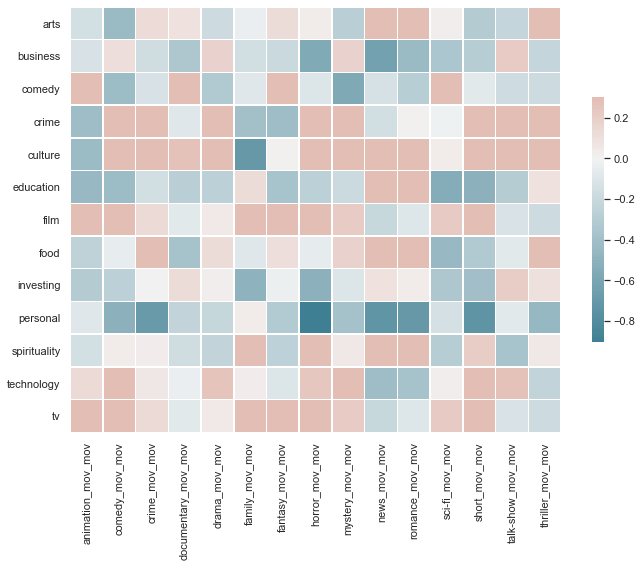

In [90]:
sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(podcast_moviesDF_corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set(xlabel='', ylabel='')

<AxesSubplot:xlabel='date', ylabel='personal'>

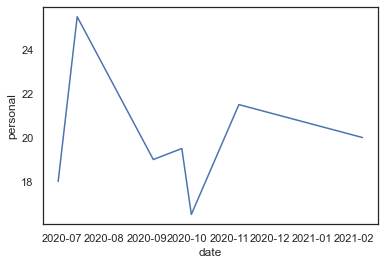

In [125]:
sns.set_theme(style="white")

sns.lineplot( x= 'date', y = 'personal', data = podcast_unstack)

In [132]:
movieDF2 = movieDF.copy().reset_index()
movieDF2

,index,action_mov,adventure_mov,animation_mov,comedy_mov,crime_mov,documentary_mov,drama_mov,family_mov,fantasy_mov,horror_mov,mystery_mov,news_mov,romance_mov,sci-fi_mov,short_mov,talk-show_mov,thriller_mov
0,0,51.64,51.43,59.59,50.86,51.18,57.24,47.92,56.94,57.66,51.14,46.64,65.00,53.19,52.90,53.38,51.25,43.21
1,1,50.57,52.55,52.84,50.17,48.11,55.30,50.24,54.38,52.03,45.22,47.48,58.14,46.36,53.00,49.50,52.60,44.10
2,2,48.00,47.91,50.80,52.98,55.24,49.81,53.81,56.12,51.92,51.67,59.52,67.30,61.58,48.30,52.40,52.53,53.81
3,3,50.90,50.13,54.18,52.79,51.90,55.25,50.40,55.94,53.17,52.26,54.59,67.52,55.35,48.85,55.57,52.35,43.90
4,4,56.25,54.28,50.76,53.59,57.79,59.92,56.37,49.25,52.58,56.44,58.44,68.92,56.90,57.24,57.61,54.82,59.38
5,5,53.56,55.44,52.88,53.33,55.42,56.52,56.00,49.03,53.96,49.42,58.11,58.57,49.59,53.16,54.17,54.77,52.00
6,6,52.07,52.40,55.42,54.03,52.59,53.74,53.76,57.06,52.81,53.68,58.17,57.11,48.29,54.30,56.68,53.12,45.28


<AxesSubplot:xlabel='index', ylabel='horror_mov'>

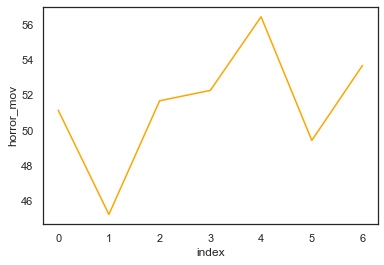

In [142]:
sns.set_theme(style="white")
sns.color_palette("rocket")

sns.lineplot( x= 'index', y = 'horror_mov', data = movieDF2, color='orange')

In [112]:
# Can we predict podcast rankings based on movie popularity?
#Caveat: this method is not ideal since I loose a time-point and the intervales btw time-points
#are not equally interspaced
timeShift_podcast = df_to_concat.drop(df_to_concat.tail(1).index).drop(columns = ['index','date'])
timeShift_movie = movieDF.drop(movieDF.head(1).index).reset_index().drop(columns = 'index')

In [113]:
timeShift = timeShift_podcast.merge(timeShift_movie, how='inner', on=None, left_index= True, right_index= True, sort=False, copy=True, indicator=False, validate=None)

In [114]:
timeShift_corr = timeShift.corr()
timeShift_corr = timeShift_corr.drop(columns = timeShift_corr.columns[0:15])
timeShift_corr.drop(timeShift_corr.tail(17).index,inplace=True)

[Text(0.5, 89.28912499999997, ''), Text(75.453125, 0.5, '')]

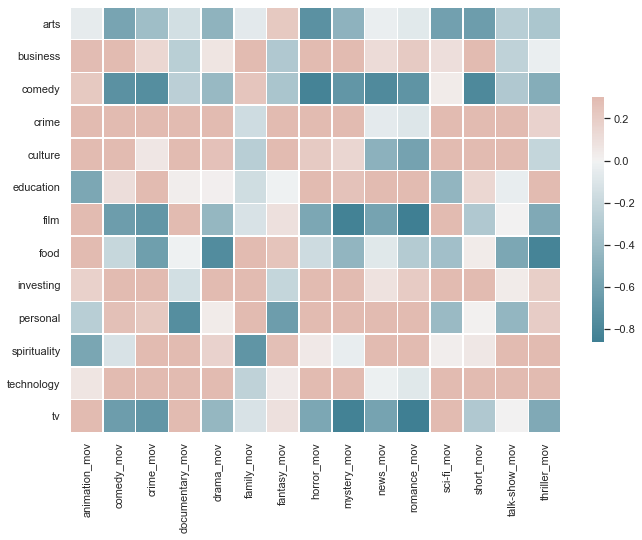

In [115]:
sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(timeShift_corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set(xlabel='', ylabel='')